In [1]:
import numpy as np
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras import losses, metrics, optimizers
from keras.utils import to_categorical
from keras.layers.regularization import dropout
import matplotlib.pyplot as plt

2023-06-30 18:29:02.794261: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-30 18:29:02.795724: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-30 18:29:02.825806: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-30 18:29:02.826326: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-30 18:29:03.238791: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train / 255., x_test / 255.
x_train, x_test = np.expand_dims(x_train, axis=3), np.expand_dims(x_test, axis=3)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
x_test.shape

(10000, 28, 28, 1)

In [3]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding = 'same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=[metrics.accuracy],
loss=losses.binary_crossentropy)

2023-06-30 18:29:04.521422: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-30 18:29:04.521691: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

In [5]:
res = model.fit(x_train, y_train, batch_size=50, epochs=300, validation_split=0.35)

Epoch 1/300
780/780 [==============================] - 5s 6ms/step - loss: 0.1079 - accuracy: 0.0013 - val_loss: 0.0701 - val_accuracy: 0.0023
Epoch 2/300
780/780 [==============================] - 4s 5ms/step - loss: 0.0627 - accuracy: 0.0071 - val_loss: 0.0596 - val_accuracy: 0.0116
Epoch 3/300
780/780 [==============================] - 4s 5ms/step - loss: 0.0532 - accuracy: 0.0138 - val_loss: 0.0530 - val_accuracy: 0.0185
Epoch 4/300
780/780 [==============================] - 4s 5ms/step - loss: 0.0472 - accuracy: 0.0198 - val_loss: 0.0475 - val_accuracy: 0.0217
Epoch 5/300
780/780 [==============================] - 4s 5ms/step - loss: 0.0426 - accuracy: 0.0246 - val_loss: 0.0471 - val_accuracy: 0.0226
Epoch 6/300
780/780 [==============================] - 4s 6ms/step - loss: 0.0390 - accuracy: 0.0290 - val_loss: 0.0463 - val_accuracy: 0.0309
Epoch 7/300
780/780 [==============================] - 4s 5ms/step - loss: 0.0360 - accuracy: 0.0330 - val_loss: 0.0459 - val_accuracy: 0.0331

Epoch 58/300
780/780 [==============================] - 5s 6ms/step - loss: 0.0040 - accuracy: 0.6460 - val_loss: 0.1917 - val_accuracy: 0.5636
Epoch 59/300
780/780 [==============================] - 5s 6ms/step - loss: 0.0042 - accuracy: 0.6588 - val_loss: 0.2144 - val_accuracy: 0.6891
Epoch 60/300
780/780 [==============================] - 5s 6ms/step - loss: 0.0044 - accuracy: 0.6622 - val_loss: 0.1872 - val_accuracy: 0.6194
Epoch 61/300
780/780 [==============================] - 5s 6ms/step - loss: 0.0043 - accuracy: 0.6708 - val_loss: 0.1838 - val_accuracy: 0.6223
Epoch 62/300
780/780 [==============================] - 4s 6ms/step - loss: 0.0040 - accuracy: 0.6845 - val_loss: 0.2327 - val_accuracy: 0.7074
Epoch 63/300
780/780 [==============================] - 4s 6ms/step - loss: 0.0048 - accuracy: 0.6877 - val_loss: 0.2306 - val_accuracy: 0.6888
Epoch 64/300
780/780 [==============================] - 5s 6ms/step - loss: 0.0042 - accuracy: 0.6967 - val_loss: 0.2056 - val_accuracy:

Epoch 115/300
780/780 [==============================] - 6s 7ms/step - loss: 0.0039 - accuracy: 0.8345 - val_loss: 0.3484 - val_accuracy: 0.8287
Epoch 116/300
780/780 [==============================] - 6s 7ms/step - loss: 0.0039 - accuracy: 0.8356 - val_loss: 0.2957 - val_accuracy: 0.7671
Epoch 117/300
780/780 [==============================] - 6s 7ms/step - loss: 0.0037 - accuracy: 0.8347 - val_loss: 0.3822 - val_accuracy: 0.8472
Epoch 118/300
780/780 [==============================] - 6s 7ms/step - loss: 0.0036 - accuracy: 0.8406 - val_loss: 0.4529 - val_accuracy: 0.8969
Epoch 119/300
780/780 [==============================] - 6s 7ms/step - loss: 0.0038 - accuracy: 0.8440 - val_loss: 0.3472 - val_accuracy: 0.8237
Epoch 120/300
780/780 [==============================] - 5s 7ms/step - loss: 0.0036 - accuracy: 0.8377 - val_loss: 0.2832 - val_accuracy: 0.7458
Epoch 121/300
780/780 [==============================] - 5s 7ms/step - loss: 0.0037 - accuracy: 0.8343 - val_loss: 0.3602 - val_ac

780/780 [==============================] - 5s 7ms/step - loss: 0.0030 - accuracy: 0.8838 - val_loss: 0.4235 - val_accuracy: 0.8432
Epoch 172/300
780/780 [==============================] - 6s 7ms/step - loss: 0.0038 - accuracy: 0.8871 - val_loss: 0.4238 - val_accuracy: 0.8593
Epoch 173/300
780/780 [==============================] - 5s 7ms/step - loss: 0.0038 - accuracy: 0.9033 - val_loss: 0.4323 - val_accuracy: 0.8574
Epoch 174/300
780/780 [==============================] - 6s 7ms/step - loss: 0.0041 - accuracy: 0.8924 - val_loss: 0.4286 - val_accuracy: 0.8438
Epoch 175/300
780/780 [==============================] - 5s 7ms/step - loss: 0.0038 - accuracy: 0.8980 - val_loss: 0.3704 - val_accuracy: 0.8245
Epoch 176/300
780/780 [==============================] - 5s 7ms/step - loss: 0.0040 - accuracy: 0.9032 - val_loss: 0.4382 - val_accuracy: 0.8615
Epoch 177/300
780/780 [==============================] - 5s 7ms/step - loss: 0.0041 - accuracy: 0.9040 - val_loss: 0.4512 - val_accuracy: 0.8812

780/780 [==============================] - 5s 7ms/step - loss: 0.0039 - accuracy: 0.9334 - val_loss: 0.6416 - val_accuracy: 0.9263
Epoch 228/300
780/780 [==============================] - 5s 7ms/step - loss: 0.0037 - accuracy: 0.9302 - val_loss: 0.4940 - val_accuracy: 0.8717
Epoch 229/300
780/780 [==============================] - 6s 7ms/step - loss: 0.0051 - accuracy: 0.9182 - val_loss: 0.3993 - val_accuracy: 0.8114
Epoch 230/300
780/780 [==============================] - 5s 7ms/step - loss: 0.0041 - accuracy: 0.9206 - val_loss: 0.5937 - val_accuracy: 0.9175
Epoch 231/300
780/780 [==============================] - 5s 7ms/step - loss: 0.0050 - accuracy: 0.9212 - val_loss: 0.6270 - val_accuracy: 0.9165
Epoch 232/300
780/780 [==============================] - 4s 5ms/step - loss: 0.0045 - accuracy: 0.9269 - val_loss: 0.5723 - val_accuracy: 0.9085
Epoch 233/300
780/780 [==============================] - 4s 5ms/step - loss: 0.0047 - accuracy: 0.9176 - val_loss: 0.6342 - val_accuracy: 0.9167

780/780 [==============================] - 5s 7ms/step - loss: 0.0048 - accuracy: 0.9469 - val_loss: 0.6812 - val_accuracy: 0.9293
Epoch 284/300
780/780 [==============================] - 5s 7ms/step - loss: 0.0046 - accuracy: 0.9505 - val_loss: 0.6699 - val_accuracy: 0.9255
Epoch 285/300
780/780 [==============================] - 5s 7ms/step - loss: 0.0059 - accuracy: 0.9474 - val_loss: 0.5616 - val_accuracy: 0.8707
Epoch 286/300
780/780 [==============================] - 5s 7ms/step - loss: 0.0053 - accuracy: 0.9474 - val_loss: 0.6271 - val_accuracy: 0.9060
Epoch 287/300
780/780 [==============================] - 5s 7ms/step - loss: 0.0041 - accuracy: 0.9540 - val_loss: 0.6233 - val_accuracy: 0.9135
Epoch 288/300
780/780 [==============================] - 5s 7ms/step - loss: 0.0039 - accuracy: 0.9477 - val_loss: 0.6767 - val_accuracy: 0.9145
Epoch 289/300
780/780 [==============================] - 5s 7ms/step - loss: 0.0051 - accuracy: 0.9400 - val_loss: 0.6460 - val_accuracy: 0.9155

In [9]:
htr = res.history
loss = htr['loss']
val_loss = htr['val_loss']
accuracy = htr['accuracy']
val_accuracy = htr['val_accuracy']
epochs = range(1, len(accuracy) + 1)

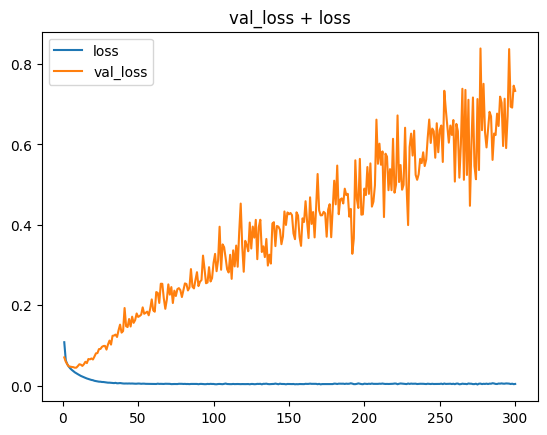

In [11]:
plt.plot(epochs, loss, label='loss')
plt.plot(epochs, val_loss, label='val_loss')
plt.title('val_loss + loss')
plt.legend()
plt.show()

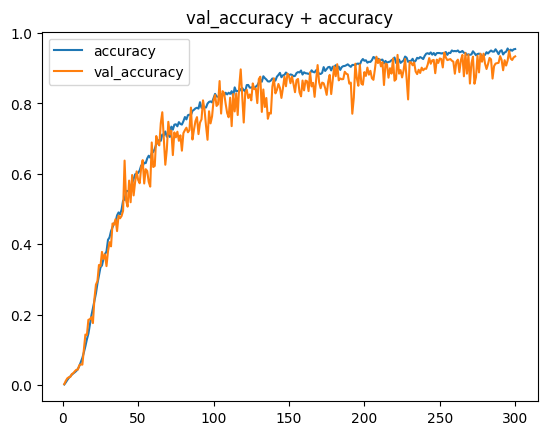

In [12]:
plt.plot(epochs, accuracy, label='accuracy')
plt.plot(epochs, val_accuracy, label='val_accuracy')
plt.title('val_accuracy + accuracy')
plt.legend()
plt.show()